🔎 RESULTADOS DE DISTANCIAS ENTRE IMÁGENES:

Chris Evans vs Zac Efron: distancia euclídea = 9315.50
Chris Evans vs Leonardo DiCaprio: distancia euclídea = 9668.99
Zac Efron vs Leonardo DiCaprio: distancia euclídea = 8793.61


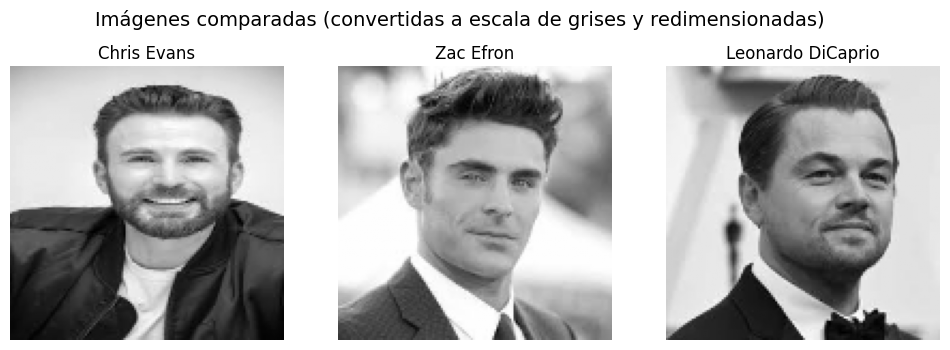

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import itertools

# --- Paso 1: Definir las imágenes ---
image_files = {
    "Chris Evans": "cris.jpg",
    "Zac Efron": "j.jpg",
    "Leonardo DiCaprio": "leonardo.jpg"
}

# --- Paso 2: Preprocesar imágenes ---
def preprocess_image(img_path, size=(64,64)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # escala de grises
    img_resized = cv2.resize(img, size)               # redimensionar
    return img_resized.flatten()                      # vector 1D

images = {name: preprocess_image(path) for name, path in image_files.items()}

# --- Paso 3: Calcular distancias euclídeas ---
def euclidean_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)

distances = {}
for (name1, vec1), (name2, vec2) in itertools.combinations(images.items(), 2):
    d = euclidean_distance(vec1, vec2)
    distances[f"{name1} vs {name2}"] = d

# --- Paso 4: Mostrar resultados de forma clara ---
print("🔎 RESULTADOS DE DISTANCIAS ENTRE IMÁGENES:\n")
for pair, d in distances.items():
    print(f"{pair}: distancia euclídea = {d:.2f}")

# --- Paso 5: Mostrar imágenes ---
plt.figure(figsize=(12,4))
for i, (name, path) in enumerate(image_files.items()):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.resize(img, (128,128)), cmap='gray')
    plt.title(name)
    plt.axis("off")
plt.suptitle("Imágenes comparadas (convertidas a escala de grises y redimensionadas)", fontsize=14)
plt.show()
